## Regression problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

### Step 1: Generate the data (1000 samples)

In [2]:
np.random.seed(42)  
n_samples = 1000
X = np.random.uniform(low=-1, high=1, size=(n_samples, 4))

In [3]:
y = np.sin(2 * np.pi * X[:, 0]) * 24 * np.exp(-(X[:, 0] + X[:, 1] + X[:, 2] + X[:, 3]))

### Step 2: Divide the data

In [4]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)  # 15% val, 15% test

In [5]:
print("Training set shape:", X_train.shape)  
print("Validation set shape:", X_val.shape)  
print("Test set shape:", X_test.shape)

Training set shape: (700, 4)
Validation set shape: (150, 4)
Test set shape: (150, 4)


### Problem 3: Build Keras network

In [6]:
model = Sequential([
    Dense(50, activation='sigmoid', input_dim=4), 
    Dense(1, activation='linear') 
])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 4: Compile the model

In [7]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

### Step 5: Fit the model

In [9]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, verbose=0)

### Step 6: Plot loss curve

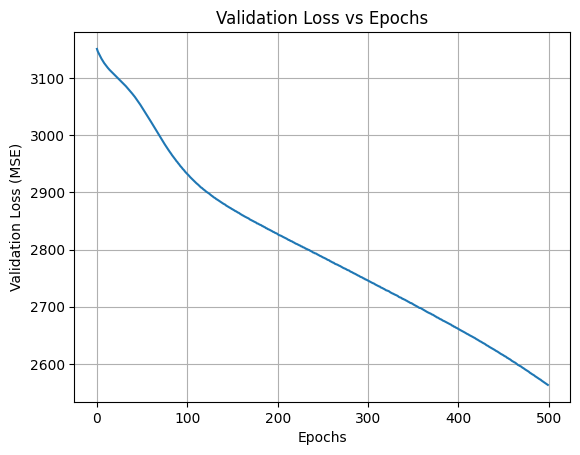

Best epoch (lowest validation loss): 500


In [10]:
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Validation Loss (MSE)")
plt.title("Validation Loss vs Epochs")
plt.grid(True)
plt.savefig("val_loss_curve.png", dpi = 300)
plt.show()
best_epoch = np.argmin(history.history['val_loss']) + 1
print(f"Best epoch (lowest validation loss): {best_epoch}")

In [11]:
best_epoch = np.argmin(history.history['val_loss']) + 1
best_val_loss = np.min(history.history['val_loss'])
print(f"Best epoch: {best_epoch}, Validation Loss: {best_val_loss:.6f}")

Best epoch: 500, Validation Loss: 2563.358398


### Step 7: Predict y values using test data

In [12]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


### Step 8: Compute RMSE

In [13]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error on Test Set: {rmse:.6f}")

Root Mean Squared Error on Test Set: 40.690079
